<a href="https://colab.research.google.com/github/MKolaksazov/Data-Science/blob/main/Colab%20code%20(graphs)/Fluorescence_Parameters_Tukey_test_letters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drawing a 'BOXPLOT' graph

Includes letters, showing the significant differences between variants, derived by the means of the Tukey's test.

Before everything else, parameters used inside this code should be defined. This is done to make corrections easier and avoid setting them inside the code.

In [186]:
# THIS COLAB NOTEBOOK SHOULD BE USED TO CALCULATE AND DRAW THE PARAMETERS OF THE PROMPT FLUORESCENCE

#!sudo locale-gen en_US.UTF-8
#!sudo update-locale

In [187]:
# PARAMETERS
# export (converted csv)_(plant species)_(method)_(date).csv
csv_file = '/content/export_gr_ojip_240711.csv'

stacked = False
sorting = True
abbreviations = False
parameter = 'Pi_Abs' # required column

y_height = 6.5 # height of the graph
y_dist = 2 # distance between labels
x_label = '' #grass forage species' #'$\it{L.}$ $\it{albus}$ cultivars' # 'Chickpea ($\mathit{Cicer}$ $\it{arietinum}$) cultivars' # 'grass forage species' # 'L. albus cultivars' # 'Sorghum cultivars' # 'grass forage species' #
y_label = '[a.u.]'
title_main =  '' #'GOX activity (Production of glyoxylate)' #

In [188]:
group_order = [
    'Lp M', 'Lp N',
    #'Ac M', 'Ac N', 'Ad M', 'Ad N',
    'Fa M', 'Fa N', 'Fp M', 'Fp N', 'Fr M', 'Fr N', 'Bi M', 'Bi N',
]

####1) importing of the libraries and the **.csv** file

The columns of this table file should containt parameters, whereas the group variants written as indexes of the rows. These indexes will be shown in the first column, named *'groups'*.

the delimiter is usually a semicolon ```;```, but can be a tabulation ```\t```


In [189]:
import pandas as pd
import numpy as np

df = pd.read_csv(csv_file, delimiter='\t', decimal='.') # delimiter '\t' or ';'

In [190]:
df = df.dropna()
if (sorting):
  df.sort_values(by="groups", key=lambda column: column.map(lambda e: group_order.index(e)), inplace=True)

1.2) Popping out the labels of the variation groups in a dataframe, called *'names'*.
Transposing the dataframe, so that it can be easily processed by the covariance test analysis and matplotlib. Converting it into numpy array.

In [191]:
# print the resulting DataFrame
#print(df)
named = np.array(df.pop('groups'))
transposed_df = df.T

1.3) An optional step required to abbreviate the longer latin names of the crops, so that they can fit in the graph.

In [192]:
#ABBREVIATION
if abbreviations:
  try:
      print('before: ', named)
      import re
      # Abbreviating the latin names from 'Aaaaa aaaaaa (L.)' to 'A. aaaaaa (L.)'
      for i in range(len(named)):
          c = named[i][0]
          #named[i] = re.sub(r'[A-Z]([a-z]+ )', c + '. ', named[i])
          named[i] = "".join(re.findall(r'\b\w', named[i]))

      print('after: ', named)
  except:
      print(named.astype(int))
      named=named.astype(int)
      print('latin names not present')

1.4) Popping out the column with the desired parameter by writing the name in the 'pop' function, as well as transposing it.

This short code is used to perform calculations, based on the compound parameters, we would like to obtain from the original data. For example we would want to find out the values of the parameter 'RC/CS$_o$'. Thus, we can use the already present in the raw data 'F$_o$', 'ABS/RC' and divide them to obtain the needed parameter.

In [193]:
from logging import exception
#DERIVED PARAMETERS
def derivations(params, y_height, y_dist, title_main):
    Fi_params = df.pop('Fi')
    Fo_params = df.pop('Fo')
    Fm_params = df.pop('Fm')
    ABS_params = df.pop('ABS/RC')
    #index = np.array(df.pop('index'))

    if params == 'Phi_Ro':
        y_height = 0.4 # height of the graph
        y_dist = 0.1 # distance between labels
        title_main = '\u03C6$_{Ro}$ '
        derived_params = (Fm_params - Fi_params)/Fm_params

    elif params == 'Phi_Eo':
        y_height = 0.7 # height of the graph
        y_dist = 0.1 # distance between labels
        title_main = '\u03C6$_{Eo}$ '
        derived_params = transposed_df.loc[params]

    elif params == 'Phi_Po':
        y_height = 1 # height of the graph
        y_dist = 0.2 # distance between labels
        title_main = '\u03C6$_{Po}$ '
        derived_params = transposed_df.loc[params]

    elif params == 'Phi_Do':
        derived_params = transposed_df.loc[params]
        y_height = np.round(derived_params.max(), 2)+0.02 # height of the graph
        y_dist = 0.1 # distance between labels
        title_main = '\u03C6$_{Do}$ '

    elif params == 'Pi_Abs':
        derived_params = transposed_df.loc[params]
        y_height = np.round(derived_params.max())+0.5 # height of the graph
        y_dist = 2 # distance between labels
        title_main = 'PI $_{ABS}$ '

    elif params == 'gamma_chl':
        y_height = 0.5 # height of the graph
        y_dist = 0.1 # distance between labels
        title_main = '\u03B3$_{chl}$'
        #transp_p = pd.to_numeric(compound_params.T)
        derived_params = 1/(ABS_params + 1)

    elif params == 'RC/CSo':
        y_height = 8000 # height of the graph
        y_dist = 2000 # distance between labels
        title_main = 'RC/CS$_O$'
        derived_params = Fo_params/ABS_params

    elif params == 'RC/CSm':
        y_height = 45000 # height of the graph
        y_dist = 5000 # distance between labels
        title_main = 'RC/CS$_M$'
        derived_params = Fm_params/ABS_params

    elif params == 'Fo':
        y_height = 17000 # height of the graph
        y_dist = 2000 # distance between labels
        title_main = 'ABS/CS$_O$ (F$_{O}$)'
        derived_params = Fo_params

    elif params == 'Fm':
        y_height = 90000 # height of the graph
        y_dist = 20000 # distance between labels
        title_main = 'ABS/CS$_M$ (F$_{M}$)'
        derived_params = Fm_params

    elif params == 'ABS/RC':
        y_height = np.round(ABS_params.max())+0.5 # height of the graph
        y_dist = 1 # distance between labels
        title_main = 'ABS/RC'
        derived_params = ABS_params

    else:
        params = df.pop(parameter) #required param
        derived_params = pd.to_numeric(params.T)

    data = pd.DataFrame({
        #'Index': index,
        'Variant': named,
        'Value': derived_params
    })

    return data, y_height, y_dist, title_main

In [194]:
# NORMALISING the very large values of the parameters
'''
compound_params = df.pop('Fm')
transp_p = pd.to_numeric(compound_params.T)

max_p1 = max(transp_df)
max_p2 = max(transp_p)
min_p1 = min(transp_df)
min_p2 = min(transp_p)

df_norm = (transp_df - min_p1) / (max_p1 - min_p1)
p_norm = (transp_p - min_p2) / (max_p2 - min_p2)
p_norm
'''

"\ncompound_params = df.pop('Fm')\ntransp_p = pd.to_numeric(compound_params.T)\n\nmax_p1 = max(transp_df)\nmax_p2 = max(transp_p)\nmin_p1 = min(transp_df)\nmin_p2 = min(transp_p)\n\ndf_norm = (transp_df - min_p1) / (max_p1 - min_p1)\np_norm = (transp_p - min_p2) / (max_p2 - min_p2)\np_norm\n"

1.5) Converting the dataframe into a 1D numpy array

In [195]:
'''
from matplotlib.patches import namedtuple
#convert dataframe to matrix
conv_arr= transp_df.values # df - one param ; cp - comp param

#converting into 1D array
one_D_array = conv_arr.ravel()

print(one_D_array, named)
'''

'\nfrom matplotlib.patches import namedtuple\n#convert dataframe to matrix\nconv_arr= transp_df.values # df - one param ; cp - comp param\n\n#converting into 1D array\none_D_array = conv_arr.ravel()\n\nprint(one_D_array, named)\n'

####2) arranging the data by samples column-wise and taking out the names of the variants in a different array

Converting the 2-D pandas dataframe into a 1-D numpy array. ```numpy.append(array1, array2) ``` can be used to append two arrays.

Probably ```pandas.dataframe.pop()``` can be used as well.

In [196]:
try:
    data, y_height, y_dist, title_main = derivations(parameter, y_height, y_dist, title_main)
except Exception as e:
    print(e)
    params = df.pop(parameter) #required param
    derived_params = pd.to_numeric(params.T)
    print('no params')
    data = pd.DataFrame({
        'Variant': named,
        'Value': derived_params
    })

3) performing the co-variance test
(the following is a variant, showing the t-test)
(currently not shown)

4) This is a very simple code, showing a Tukey's test analysis and printing the summarized data

# writing out the combinations of the groups:
```
result.pvalues[result.pvalues < 0.05]
result.reject
result_list = result.groupsunique.tolist()
all_groups = []
// writing out the all possible combinations:
while result_list:
  for n in result_list:
    if result_list[0] != n:
      print(result_list[0], n)
      all_groups.append(str(result_list[0] + n))
  result_list.pop(0)

all_groups
// finding out the rejected groups (p < 0.05):
t = list(result.reject) // all groups (true or false)

from itertools import compress
ind = list(compress(range(len(t)), t)) // indeces of groups if reject == True

for i in ind:
  print(all_groups[i])

// other variant:
// find all indeces of p-values within range
print(np.where(result.pvalues >= 0.05)[0])
print(np.where(np.logical_and(result.pvalues < 0.05, result.pvalues >= 0.01))[0])
print(np.where(np.logical_and(result.pvalues < 0.01, result.pvalues >= 0.001))[0])
print(np.where(result.pvalues < 0.001)[0])

ind = np.where(result.pvalues < 0.001)[0]

for i in ind:
  print(all_groups[i])
```

In [197]:
import statsmodels.stats.multicomp as mc

value = 'Value' #'8 TAC' #'Value'
variant = 'Variant' #'8 groups' #'Variant'
sorting_labels = variant
if stacked: data = df
old_data = data
dataVariant = data #data[~data[variant].str.endswith('N')]

# Perform one-way ANOVA to check for significant differences
model = mc.MultiComparison(dataVariant[value].astype('float'), dataVariant[variant])
#model = mc.MultiComparison(data['6 TAC'], data['6 groups'])
result = model.tukeyhsd()
#print(np.sum(result.reject), len(result.reject))
#result.groups[result.pvalues < 0.05]
#result.groups[result.reject==True]
# The null hypothesis H0 for the test states that the means of the tested groups are equal.
result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Bi M,Bi N,0.5332,0.9838,-1.1445,2.2109,False
Bi M,Fa M,2.0797,0.0005,0.7098,3.4495,True
Bi M,Fa N,1.6218,0.065,-0.0559,3.2995,False
Bi M,Fp M,2.5198,0.0,1.15,3.8897,True
Bi M,Fp N,1.4598,0.1324,-0.2179,3.1375,False
Bi M,Fr M,-1.4961,0.06,-3.0276,0.0354,False
Bi M,Fr N,-1.0158,0.5716,-2.6935,0.6619,False
Bi M,Lp M,0.3705,0.9948,-0.9993,1.7403,False
Bi M,Lp N,-1.0508,0.5259,-2.7285,0.6269,False
Bi N,Fa M,1.5465,0.0913,-0.1312,3.2242,False


In [198]:
print(np.where(np.round(result.meandiffs, 2) == 0.53)) # 46 Bi 85 Fr

(array([0]),)


In [199]:
result_list = result.groupsunique.tolist()
all_groups = []

while result_list:
  for n in result_list:
    if result_list[0] != n:
      all_groups.append(str(result_list[0] + n))
  result_list.pop(0)

print(np.where(result.pvalues >= 0.05)[0])
print(np.where(np.logical_and(result.pvalues < 0.05, result.pvalues >= 0.01))[0])
print(np.where(np.logical_and(result.pvalues < 0.01, result.pvalues >= 0.001))[0])
print(np.where(result.pvalues < 0.001)[0])

ind = np.where(result.pvalues < 0.001)[0]

#for i in ind:
#  print(all_groups[i])

[ 0  2  4  5  6  7  8  9 10 12 14 15 16 17 18 19 24 25 28 30 37 39 41 42
 43 44]
[11 13]
[22 27 29 36 38 40]
[ 1  3 20 21 23 26 31 32 33 34 35]


In [200]:
import scipy.stats as stats
import matplotlib.pyplot as plt

y_ticks = np.round(np.arange(0, y_height, y_dist), 1)
y_ticks

array([0., 2., 4., 6.])

In [201]:
# define columns for data and then grouping
col_to_group=sorting_labels
col_for_data=value
data = dataVariant

#Now take teh data and regroup for anova
samples = [cols[1] for cols in data.groupby(col_to_group)[col_for_data]]
#I am not sure how this works but it makes an numpy array for each group
f_val, p_val = stats.f_oneway(*samples)
# I am not sure what this star does but this passes all the numpy arrays correctly

# this if statement can be uncommmented if you don't won't to go furhter with out p<0.05
#if p_val<0.05:    #If the p value is less than 0.05 it then does the tukey
mod = mc.MultiComparison(data[col_for_data].astype('float'), data[col_to_group])
thsd=mod.tukeyhsd()

#this is a function to do Piepho method.
#AN Alogrithm for a letter based representation of al-pairwise comparisons.
tot=len(thsd.groupsunique)
print(thsd.groupsunique)
#make an empty dataframe that is a square matrix of size of the groups. #set first column to 1
df_ltr=pd.DataFrame(np.nan, index=np.arange(tot),columns=np.arange(tot))
#df_ltr.iloc[:,0]=1
df_ltr[df_ltr.columns[0]] = 1
#df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)

count=0
df_nms = pd.DataFrame('', index=np.arange(tot), columns=['names'])

# I make a dummy dataframe to put axis labels into.  sd stands for signifcant difference

for i in np.arange(tot):   #I loop through and make all pairwise comparisons.
    for j in np.arange(i+1,tot):
        #print('i=',i,'j=',j,thsd.reject[count])
        if thsd.reject[count]==True:
            for cn in np.arange(tot):
                if df_ltr.iloc[i,cn]==1 and df_ltr.iloc[j,cn]==1:
                  #If the column contains both i and j shift and duplicat
                    df_ltr=pd.concat([df_ltr.iloc[:,:cn+1],df_ltr.iloc[:,cn+1:].T.shift().T],axis=1)
                    df_ltr[df_ltr.columns[cn+1]]=df_ltr[df_ltr.columns[cn]]
                    df_ltr.iloc[i,cn]=0
                    df_ltr.iloc[j,cn+1]=0
                #Now we need to check all columns for abosortpion.
                for cleft in np.arange(len(df_ltr.columns)-1):
                    for cright in np.arange(cleft+1,len(df_ltr.columns)):
                        if (df_ltr[df_ltr.columns[cleft]].isna()).all()==False and (df_ltr[df_ltr.columns[cright]].isna()).all()==False:
                            if (df_ltr[df_ltr.columns[cleft]]>=df_ltr[df_ltr.columns[cright]]).all()==True:
                                df_ltr[df_ltr.columns[cright]]=0
                                df_ltr=pd.concat([df_ltr[df_ltr.columns[:cright]],df_ltr[df_ltr.columns[cright:]].T.shift(-1).T],axis=1)
                            if (df_ltr[df_ltr.columns[cleft]]<=df_ltr[df_ltr.columns[cright]]).all()==True:
                                df_ltr[df_ltr.columns[cleft]]=0
                                df_ltr=pd.concat([df_ltr[df_ltr.columns[:cleft]],df_ltr[df_ltr.columns[cleft:]].T.shift(-1).T],axis=1)

        count+=1

#I sort so that the first column becomes A
df_ltr=df_ltr.sort_values(by=list(df_ltr.columns),axis=1,ascending=False)

# I assign letters to each column
for cn in np.arange(len(df_ltr.columns)):
    df_ltr[df_ltr.columns[cn]]=df_ltr[df_ltr.columns[cn]].replace(1,chr(97+cn))
    df_ltr[df_ltr.columns[cn]]=df_ltr[df_ltr.columns[cn]].replace(0,'')
    df_ltr[df_ltr.columns[cn]]=df_ltr[df_ltr.columns[cn]].replace(np.nan,'')
    #print(df_ltr.columns[cn])

#I put all the letters into one string
df_ltr=df_ltr.astype(str)
df_ltr.sum(axis=1)


['Bi M' 'Bi N' 'Fa M' 'Fa N' 'Fp M' 'Fp N' 'Fr M' 'Fr N' 'Lp M' 'Lp N']


,0
0,abc
1,abd
2,de
3,ade
4,e
5,ade
6,c
7,bc
8,ab
9,bc


In [202]:
new_df_ltr = np.array(df_ltr.sum(axis=1))
new_ltr = []
# ORDERING OF THE LETTERS!!!
for i in range(len(group_order)):
  ltr = [group_order[i], thsd.groupsunique.tolist().index(group_order[i]),
  new_df_ltr[thsd.groupsunique.tolist().index(group_order[i])]]
  print(ltr)
  new_ltr.append(ltr[2])
#print(np.array(df_ltr.sum(axis=1)), new_ltr)

['Lp M', 8, 'ab']
['Lp N', 9, 'bc']
['Fa M', 2, 'de']
['Fa N', 3, 'ade']
['Fp M', 4, 'e']
['Fp N', 5, 'ade']
['Fr M', 6, 'c']
['Fr N', 7, 'bc']
['Bi M', 0, 'abc']
['Bi N', 1, 'abd']


In [203]:
def draw_letters(y, follow_bars=False, bplt=0, fsize=10, rotation=0):

  for i, grp in enumerate(pd.unique(data[variant].values)):   #I loop through the groups to make the scatters and figure out the axis labels.
      if follow_bars:
        y_pos = data[data[variant] == grp][value].max() + y * -0.05
      else:
        y_pos = y * 0.98 #y_pos = ax.get_ylim()[1]*1
      ax.text(i+bplt, y_pos, new_ltr[i],
              rotation=rotation, fontsize=fsize, verticalalignment='top', horizontalalignment='center')

In [204]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

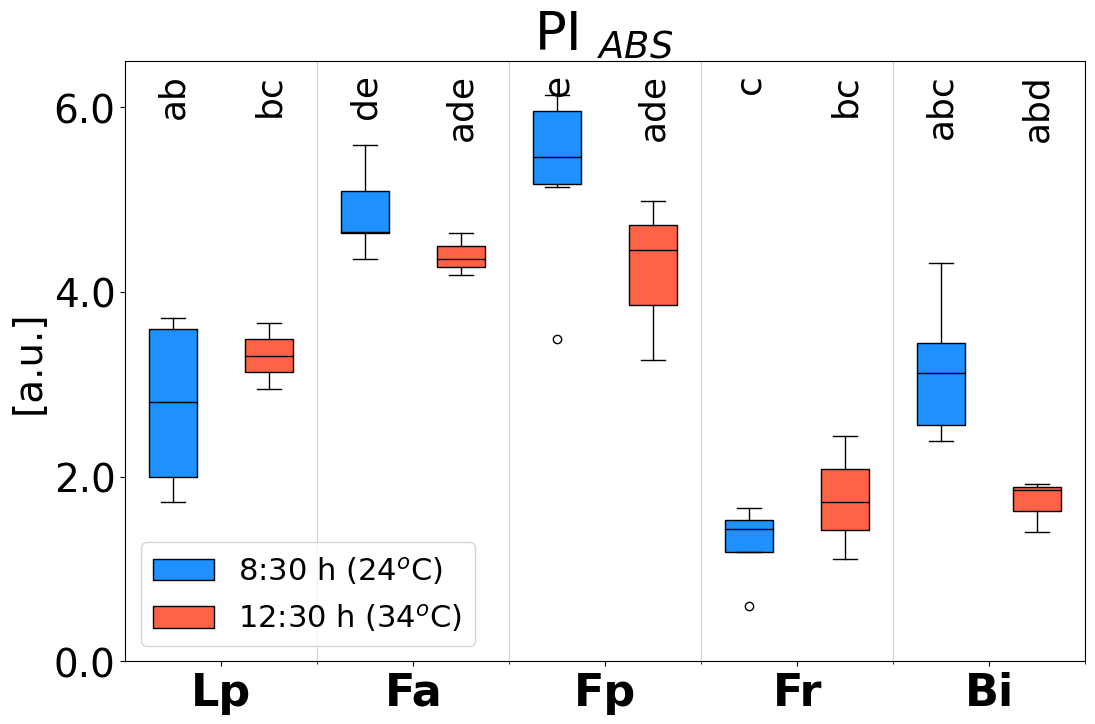

In [205]:
#Now to plot like R with a violing plot
fig,ax=plt.subplots(figsize=(12,8))
'''
# For sorting !
labels = pd.unique(data[variant]).astype(str)
# create categorical data type and set categorical column as new data type
dtype = pd.CategoricalDtype(labels, ordered=False)
data[sorting_labels] = data[sorting_labels].astype(dtype)
labels_new = [i[5:] for i in labels]
'''

#print(dtype)
bp_dict = data.boxplot(column=col_for_data, by=sorting_labels, ax=ax, fontsize=18, patch_artist = True,
             medianprops=dict(color='black'), # the median line
             boxprops=dict(color='black'),
             whiskerprops=dict(color='black')
             )

draw_letters(y_height, False, 1, fsize=26, rotation=90)

fill_colors = ['tomato', 'dodgerblue', 'navy', 'dodgerblue']
colors = ['tomato', 'dodgerblue', 'navy', 'dodgerblue']
children = []

for b in range(7):
  for a in range(2):
    repeated = np.tile(np.concatenate([np.repeat(i, j) for i, j
                                       # the median line
          in zip([fill_colors[a], 'black', 'black', 'black'], [1, 4, 1, 1])]), 1)
    colors = np.append(repeated, colors)

# OJIP graph
from matplotlib.patches import PathPatch

for patch, color in zip(bp_dict.get_children(), colors):
  if isinstance(patch, PathPatch):
    patch.set(facecolor = color)

# OJIP graph
children = [bp_dict.get_children()[0], bp_dict.get_children()[7],
            bp_dict.get_children()[14], bp_dict.get_children()[28]]

labels1=['$\it{L. albus}$ mono', '$\it{L. albus}$ mixed',
        '$\it{H. vulgare}$ mono', '$\it{H. vulgare}$ mixed']

labels=['8:30 h (24$^{o}$C)', '12:30 h (34$^{o}$C)']

#ax.set_xticklabels([i[5:] for i in group_order], fontsize=24, style='normal', weight='bold', rotation=90)
ax.set_xticks(np.arange(1.5, 9.6, 2), labels=group_order[::2], fontsize=16)
ax.set_xticklabels([i[:2] for i in group_order[::2]], fontsize=32, style='normal', weight='bold', rotation=0)

plt.ylim(ymax=y_height)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=28, rotation=0)
ax.set_ylabel(y_label, fontsize=28)

ax.set(title='', ylabel=y_label, xlabel=x_label)
ax.set_title(title_main, fontsize=38, rotation=0)

# OJIP graph
ax.legend(handles=children, labels=labels,
          loc='lower left', fontsize=22)

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
minor_locator = AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minor_locator)

# OJIP graph
plt.grid(False)
ax.yaxis.grid(False)
ax.xaxis.grid(True, linestyle='-', which='minor', color='lightgrey', alpha=1)
fig.suptitle('')
fig.savefig('anovatest.jpg',dpi=600,bbox_inches='tight')